# K-Nearest Neighbor and Bias-Variance Trade-off
### Basic concept
K-Nearest Neighbor is a nonparametric method that predicts the target point $x$ with averages of nearby observations in training data.
### KNN Algorithm

In [81]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import statistics as s

In [90]:
# Calculate Euclidean Distance
from math import sqrt
def Euclidean_Distance(v1,v2):
    distance=0
    for i in range(len(v1)):
        distance=distance+(v1[i]-v2[i])**2
    return sqrt(distance)

# Predict based on nearest neighbor
def myknn(xtrain,xtest,ytrain,k):
    dist=[]
    i=0
    for x in xtrain:
        d=Euclidean_Distance(x,xtest)
        dist.append([i,d])
        i=i+1
    sorted_dist = sorted(dist, key=lambda x: x[1])
    index=[]
    for i in range(k):
        index.append(sorted_dist[i][0])
    predict=[]
    for j in index:
        predict.append(ytrain[j])
    return s.mean(predict)

### Example (KNN in regression)
Generate training data with $2*sin(x)$ and random Gaussian errors

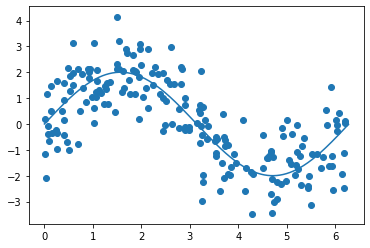

In [123]:
random.seed(1)
n=200
x1=np.random.uniform(0,2*math.pi,n).tolist()
y=[2*math.sin(i)+np.random.normal(0,1,1)[0] for i in x1]
x=[]
for x1 in x1:
    x.append([x1])
test_x1=np.arange(0, 1, 0.001)*2*math.pi
test_x=[]
for i in test_x1:
    test_x.append([i])
test_y=[2*math.sin(i)+np.random.normal(0,1,1)[0] for i in test_x1]
plt.scatter(x,y)
plt.plot(test_x1, [2*math.sin(i) for i in test_x1])
plt.show()

### Tuning K
I will predict the model when k=1,5,20,30

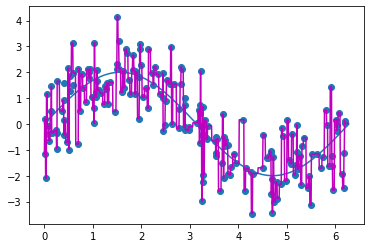

In [124]:
# 1-nearest neighbor
k = 1
y_predict=[]
for i in range(len(test_x)):
    y_predict.append(myknn(xtrain=x,xtest=test_x[i],ytrain=y,k=k))
plt.scatter(x,y)
plt.plot(test_x1, [2*math.sin(i) for i in test_x1])
plt.plot(test_x,y_predict,'m')
plt.show()

In [125]:
# prediction error
s.mean([(y_predict[i] - test_y[i])**2 for i in range(len(y_predict))])

1.8872701148299376

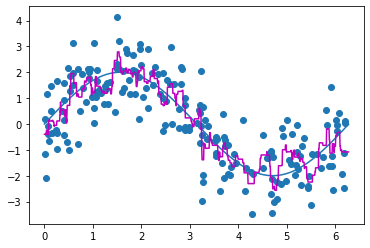

In [126]:
# 5-nearest neighbor
k = 5
y_predict=[]
for i in range(len(test_x)):
    y_predict.append(myknn(xtrain=x,xtest=test_x[i],ytrain=y,k=k))
plt.scatter(x,y)
plt.plot(test_x1, [2*math.sin(i) for i in test_x1])
plt.plot(test_x,y_predict,'m')
plt.show()

In [127]:
# prediction error
s.mean([(y_predict[i] - test_y[i])**2 for i in range(len(y_predict))])

1.2373802756040448

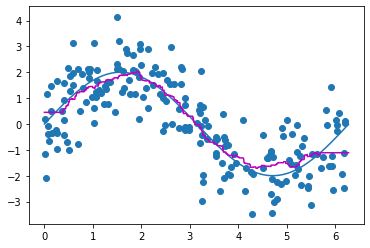

In [128]:
# 5-nearest neighbor
k = 20
y_predict=[]
for i in range(len(test_x)):
    y_predict.append(myknn(xtrain=x,xtest=test_x[i],ytrain=y,k=k))
plt.scatter(x,y)
plt.plot(test_x1, [2*math.sin(i) for i in test_x1])
plt.plot(test_x,y_predict,'m')
plt.show()

In [129]:
# prediction error
s.mean([(y_predict[i] - test_y[i])**2 for i in range(len(y_predict))])

1.0892231639858

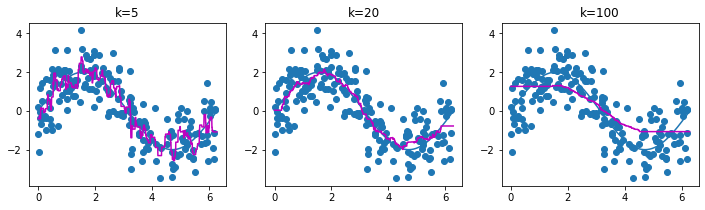

In [133]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
k = 5
y_predict=[]
for i in range(len(test_x)):
    y_predict.append(myknn(xtrain=x,xtest=test_x[i],ytrain=y,k=k))
plt.scatter(x,y)
plt.plot(test_x1, [2*math.sin(i) for i in test_x1])
plt.plot(test_x,y_predict,'m')
plt.title("k=5")

plt.subplot(132)
k = 20
y_predict=[]
for i in range(len(test_x)):
    y_predict.append(myknn(xtrain=x,xtest=test_x[i],ytrain=y,k=k))
plt.scatter(x,y)
plt.plot(test_x1, [2*math.sin(i) for i in test_x1])
plt.plot(test_x,y_predict,'m')
plt.title("k=20")

plt.subplot(133)
k = 100
y_predict=[]
for i in range(len(test_x)):
    y_predict.append(myknn(xtrain=x,xtest=test_x[i],ytrain=y,k=k))
plt.scatter(x,y)
plt.plot(test_x1, [2*math.sin(i) for i in test_x1])
plt.plot(test_x,y_predict,'m')
plt.title("k=100")

plt.show()

When k becomes larger and larger, the model becomes more stable.

### Prediction Error
Consider a regression model. $Y=f(x)+\epsilon$, where $E(\epsilon)=0, V(\epsilon)=\sigma^2$. The prediction error can be broken into three parts: the irreducible error, the bias squared, and variance.

\begin{aligned}
E\Big[ \big( Y - \widehat f(x_0) \big)^2 \Big] &= E \Big[ \big( Y - f(x_0) + f(x_0) -  E[\widehat f(x_0)] + E[\widehat f(x_0)] - \widehat f(x_0) \big)^2 \Big] \\
&= E \Big[ \big( Y - f(x_0) \big)^2 \Big] + E \Big[ \big(f(x_0) -  E[\widehat f(x_0)] \big)^2 \Big] + E\Big[ \big(E[\widehat f(x_0)] - \widehat f(x_0) \big)^2 \Big] + \text{Cross Terms}\\
&= \underbrace{E\Big[ ( Y - f(x_0))^2 \big]}_{\text{Irreducible Error}} +
\underbrace{\Big(f(x_0) - E[\widehat f(x_0)]\Big)^2}_{\text{Bias}^2} + 
\underbrace{E\Big[ \big(\widehat f(x_0) - E[\widehat f(x_0)] \big)^2 \Big]}_{\text{Variance}}
\end{aligned}

##### 1. Irreducible error
This error could not be avoided because we cannot predict $\epsilon$
##### 2. Squared bias
This error represents the inability for a machine learning method to capture the true relationship
##### 3. Variance
This error refers to the amount by which $\hat f$ would change if we estimated it using a different training dataset.

Generally, if we use more flexible methods, the variance will increase and the bias will decrease.

In [135]:
error=[]
k=np.arange(1,101,1)
for k in k:
    y_predict=[]
    for i in range(len(test_x)):
        y_predict.append(myknn(xtrain=x,xtest=test_x[i],ytrain=y,k=k))  
    err=s.mean([(y_predict[i] - test_y[i])**2 for i in range(len(y_predict))])
    error.append(err)    

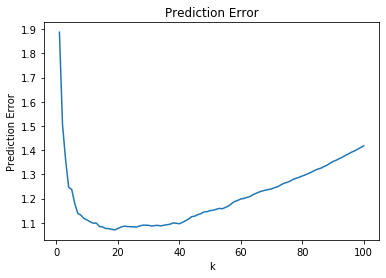

In [140]:
plt.plot(np.arange(1,101,1), error)
plt.title("Prediction Error")
plt.xlabel('k')
plt.ylabel('Prediction Error')
plt.show()

This is an U shape in this plot.